In [1]:
import tensorflow as tf  #tf >2.0
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
tf.__version__

'2.2.0'

In [3]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [7]:
train_datagen= ImageDataGenerator(rescale=1./255,
                                  shear_range=0.2,
                                    zoom_range=0.2,
                                  vertical_flip=True,
                                  horizontal_flip=True)

In [9]:
# Training Set
training_set = train_datagen.flow_from_directory(r'D:\Python37\Projects\Monkey Breed Classification using Deep Learning\train',
                                                 target_size=(224,224),class_mode='categorical',batch_size=16
                                         )

Found 1098 images belonging to 10 classes.


In [10]:
# Test Set
test_datagen= ImageDataGenerator(rescale=1./255)

test_set= test_datagen.flow_from_directory(r'D:\Python37\Projects\Monkey Breed Classification using Deep Learning\validation',
                                          target_size=(224,224),class_mode='categorical',batch_size=16)

Found 272 images belonging to 10 classes.


# Lets make CNN

In [14]:
#Initalising the CNN
cnn=tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3,activation='relu',input_shape=[224,224,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))
cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))
cnn.add(tf.keras.layers.Dense(units=10,activation='softmax'))




In [15]:
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 100352)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               12845184  
_________________________________________________________________
dense_1 (Dense)              (None, 10)               

# Lets Train

In [20]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

history=cnn.fit(x = training_set, validation_data = test_set, epochs = 10)

Epoch 1/10
69/69 [==============================] - 66s 960ms/step - loss: 2.2639 - accuracy: 0.1976 - val_loss: 1.9007 - val_accuracy: 0.3199
Epoch 2/10
69/69 [==============================] - 32s 457ms/step - loss: 1.8477 - accuracy: 0.3124 - val_loss: 1.7805 - val_accuracy: 0.3456
Epoch 3/10
69/69 [==============================] - 32s 457ms/step - loss: 1.6300 - accuracy: 0.4217 - val_loss: 1.5643 - val_accuracy: 0.4559
Epoch 4/10
69/69 [==============================] - 32s 459ms/step - loss: 1.4836 - accuracy: 0.4517 - val_loss: 1.5197 - val_accuracy: 0.4522
Epoch 5/10
69/69 [==============================] - 32s 464ms/step - loss: 1.4091 - accuracy: 0.4991 - val_loss: 1.3805 - val_accuracy: 0.5221
Epoch 6/10
69/69 [==============================] - 32s 457ms/step - loss: 1.3065 - accuracy: 0.5383 - val_loss: 1.3983 - val_accuracy: 0.5110
Epoch 7/10
69/69 [==============================] - 32s 460ms/step - loss: 1.1748 - accuracy: 0.5856 - val_loss: 1.3390 - val_accuracy: 0.5588

In [21]:
history.model.save(r'D:\Python37\Projects\Monkey Breed Classification using Deep Learning\models\model-10.h5')

In [22]:
model=tf.keras.models.load_model(r'D:\Python37\Projects\Monkey Breed Classification using Deep Learning\models\model-10.h5')

In [23]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 100352)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               12845184  
_________________________________________________________________
dense_1 (Dense)              (None, 10)               

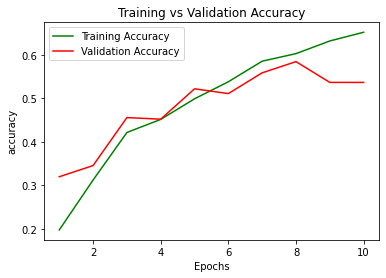

In [27]:
import matplotlib.pyplot as plt
acc_train=history.history['accuracy']
acc_val=history.history['val_accuracy']
epochs=range(1,11)
plt.plot(epochs,acc_train,'g',label='Training Accuracy')
plt.plot(epochs,acc_val,'r',label='Validation Accuracy')
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

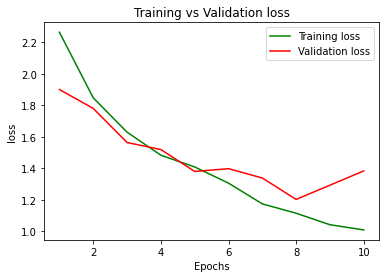

In [28]:
import matplotlib.pyplot as plt
loss_train=history.history['loss']
loss_val=history.history['val_loss']
epochs=range(1,11)
plt.plot(epochs,loss_train,'g',label='Training loss')
plt.plot(epochs,loss_val,'r',label='Validation loss')
plt.title("Training vs Validation loss")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

# Testing

In [50]:
import numpy as np
import pandas as pd
from PIL import Image
from tensorflow.keras.preprocessing import image

In [51]:
txt=pd.read_csv(r'D:\Python37\Projects\Monkey Breed Classification using Deep Learning\monkey_labels.txt')

In [52]:
txt

,Label,Latin Name,Common Name,Train Images,Validation Images
0,n0,alouatta_palliata\t,mantled_howler,131,26
1,n1,erythrocebus_patas\t,patas_monkey,139,28
2,n2,cacajao_calvus\t,bald_uakari,137,27
3,n3,macaca_fuscata\t,japanese_macaque,152,30
4,n4,cebuella_pygmea\t,pygmy_marmoset,131,26
5,n5,cebus_capucinus\t,white_headed_capuchin,141,28
6,n6,mico_argentatus\t,silvery_marmoset,132,26
7,n7,saimiri_sciureus\t,common_squirrel_monkey,142,28
8,n8,aotus_nigriceps\t,black_headed_night_monkey,133,27
9,n9,trachypithecus_johnii,nilgiri_langur,132,26


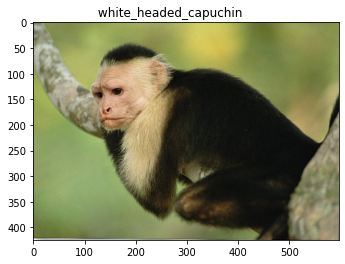

In [74]:
test_image=r'D:\Python37\Projects\Monkey Breed Classification using Deep Learning\train\n5\n5022.jpg'
open_image=Image.open(test_image)
test_image=image.load_img(test_image,target_size=(224,224))
test_image=image.img_to_array(test_image)
test_image=test_image/255
test_image=np.expand_dims(test_image,axis=0)
result=model.predict(test_image)
result=np.argmax(result)
Name=txt.iloc[result]
Name=Name.iloc[2]
plt.imshow(open_image)
plt.title(Name)
plt.show()